In [2]:
library(tidyverse)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(ggsci)
library(ggvenn)
library(ComplexHeatmap)
library(RColorBrewer)
library(ggbeeswarm)
library(tidyr)
library(circlize)
library(fastcluster)
library(magick)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: grid

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformati

ERROR: Error in library(magick): there is no package called ‘magick’


In [ ]:
setwd("/data/wuqinhua/phase/covid19")

## 1. Attribution score top20 gene

In [7]:
covid_H = read.table('./Analysis_result/Attr_result/attr_H_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_H = subset(covid_H[,-1])
covid_H <- covid_H[order(covid_H$attr_value, decreasing = TRUE),]
H_top20 <- covid_H[1:20, ]
colors <- colorRampPalette(c("#B3EE3A","#006400"))(20)#
p1 = ggplot(H_top20, mapping = aes(x = reorder(gene_name,attr_value), y = attr_value)) +
  geom_bar(stat = 'identity',fill=colors,width=0.78,position =position_dodge(0.7)) +
  labs(x= " ",y="Covid19_H Attribution Score", fill = "gene_name",size=8,family = "sans", face = "bold.italic") +
  coord_flip()+
  geom_text(aes(label = sprintf("%.3f",attr_value)),size =3,hjust = ifelse(H_top20$attr_value < 0,0,1))+
  scale_fill_manual(name = "Gene",values = colors) +
  theme_classic() +
  theme(axis.text = element_text(family = "sans",size = 10, face = "bold.italic"))
#ggsave('./plot/top20_H.png',p1,width =6,height=8)

covid_M = read.table('./Analysis_resultAttr_result/attr_M_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_M = subset(covid_M[,-1])
covid_M <- covid_M[order(covid_M$attr_value, decreasing = TRUE),]
M_top20 <- covid_M[1:20, ]
colors <- colorRampPalette(c("#87CEFA","#1C86EE"))(20)#
p2 <- ggplot(M_top20, mapping = aes(x = reorder(gene_name,attr_value), y = attr_value)) +
  geom_bar(stat = 'identity',fill=colors,width=0.78,position =position_dodge(0.7)) +
  labs(x= " ",y="Covid19_M Attribution Score", fill = "gene_name",size=8,family = "sans", face = "bold.italic") +
  coord_flip()+
  geom_text(aes(label = sprintf("%.3f",attr_value)),size =3,hjust = ifelse(M_top20$attr_value < 0,0,1))+
  scale_fill_manual(name = "Gene",values = colors) +
  theme_classic() +
  theme(axis.text = element_text(family = "sans",size = 10, face = "bold.italic"))
#ggsave('./plot/top20_M.png',p2,width =6,height=8)

covid_S = read.table('./Analysis_result/Attr_result/attr_S_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_S = subset(covid_S[,-1])
covid_S <- covid_S[order(covid_S$attr_value, decreasing = TRUE),]
S_top20 <- covid_S[1:20, ]
colors <- colorRampPalette(c("#FFD700","#EE7942"))(20)#
p3 <- ggplot(S_top20, mapping = aes(x = reorder(gene_name,attr_value), y = attr_value)) +
  geom_bar(stat = 'identity',fill=colors,width=0.78,position =position_dodge(0.7)) +
  labs(x= " ",y="Covid19_S Attribution Score", fill = "gene_name",size=8,family = "sans", face = "bold.italic") +
  coord_flip()+
  geom_text(aes(label = sprintf("%.3f",attr_value)),size =3,hjust = ifelse(S_top20$attr_value < 0,0,1))+
  scale_fill_manual(name = "Gene",values = colors) +
  theme_classic() +
  theme(axis.text = element_text(family = "sans",size = 10, face = "bold.italic"))
#ggsave('./plot/top20_S.png',p3,width =6,height=8)

p = p1+p2+p3
ggsave('./Plot/Attr_plot/top20_all.pdf',p,width =18,height=8)

## 2. venn plot of H-M-S

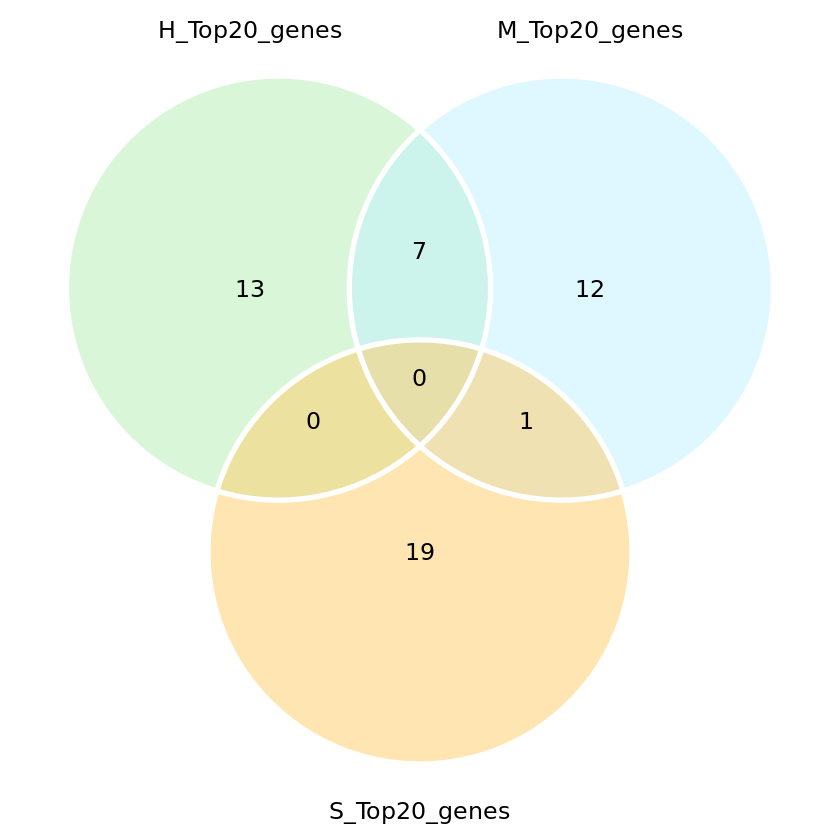

In [4]:
covid_H = read.table('./Analysis_result/Attr_result/attr_H_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_H = subset(covid_H[,-1])
covid_H <- covid_H[order(covid_H$attr_value, decreasing = TRUE),]
H_genes <- covid_H[1:20, 1]
covid_M = read.table('./Analysis_result/Attr_result/attr_M_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_M = subset(covid_M[,-1])
covid_M <- covid_M[order(covid_M$attr_value, decreasing = TRUE),]
M_genes <- covid_M[1:20, 1]
covid_S = read.table('./Analysis_result/Attr_result/attr_S_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_S = subset(covid_S[,-1])
covid_S <- covid_S[order(covid_S$attr_value, decreasing = TRUE),]
S_genes <- covid_S[1:20, 1]
dat = list(H_Top20_genes=H_genes, M_Top20_genes=M_genes, S_Top20_genes=S_genes)
p1 <- ggvenn(dat,show_percentage = F,stroke_color = "white",stroke_size = 1.5,
             fill_color = c("#B4EEB4", "#BFEFFF", "#FFCC66"),
             set_name_size = 5,text_size=5)
p1
ggsave("./Plot/Attr_plot/ggvenn_top20.pdf", p1, width=5, height=5)

unique_H_genes <- setdiff(H_genes, c(M_genes, S_genes))
unique_M_genes <- setdiff(M_genes, c(H_genes, S_genes))
unique_S_genes <- setdiff(S_genes, c(H_genes, M_genes))

# 将结果保存到数据框中，确保每列长度一致
max_length <- max(length(unique_H_genes), length(unique_M_genes), length(unique_S_genes))
unique_H_genes <- c(unique_H_genes, rep(NA, max_length - length(unique_H_genes)))
unique_M_genes <- c(unique_M_genes, rep(NA, max_length - length(unique_M_genes)))
unique_S_genes <- c(unique_S_genes, rep(NA, max_length - length(unique_S_genes)))

gene_unique <- data.frame(H=unique_H_genes, M=unique_M_genes, S=unique_S_genes)
write.csv(gene_unique, file = "./Plot/Attr_plot/unique_Topgenes_venn.csv", row.names = FALSE)


## 3. Heatmap of top20 gene attribution score

In [ ]:
combined_genes <- union(union(H_top20$gene_name, M_top20$gene_name), S_top20$gene_name)
unique_genes <- unique(combined_genes)

data = read.csv('./Analysis_result/Attr_result/attr_sample_PHASE.csv',row.names = 1)
selected_columns <- names(data) %in% unique_genes
all_top20 = data[, selected_columns, drop = FALSE]
all_top20 = as.matrix(all_top20)
all_top20 <- apply(all_top20, 2, function(x) (x - min(x)) / (max(x) - min(x)))
all_top20

condition = read.csv('./COVID19_sample_condition_560.csv')
rownames(condition) <- gsub("\\.", "_", rownames(condition))
dict1 <- setNames(condition$group, condition$sample_id)
dict2 <- setNames(condition$Source, condition$sample_id)

group = c()
dataset = c()
for (i in seq_along(row.names(all_top20))){
  row_name <- row.names(all_top20)[i]
  g <- dict1[row_name]
  group[i] <- g
  d <- dict2[row_name]
  dataset[i] <- d
  }
df <- data.frame(group, dataset)
expData = t(scale(t(all_top20)))
expData = pmax(pmin(expData,2),-2)

col_fun = colorRamp2(c(-2,-1,0,1,2),rev(brewer.pal(n = 5, name = "RdBu")))

left_ha = rowAnnotation(Cluster = df$group,Dataset = df$dataset, simple_anno_size = unit(8,'points'),
                        col = list(Cluster = c("H" = '#66DD00',"M"="#77DDFF","S"="#FFBB66"),
                                   Dataset = c("Arunachalam_2020"="#377EB8","COMBAT_2022"="darkorchid1","Combes_2021"="#A6D854",
                                               "Liu_2021"="#66C2A5","Ren_2021"="#0000C6","Schulte-Schrepping_2020"="khaki2",
                                               "Schuurman_2021"="#4DAF4A","Stephenson_2021"="#999999","Unterman_2022"="#984EA3",
                                               "Wilk_2021"="#E5C494","Zhao_2021"="#E41A1C","Zhu_2020"="#8DA0CB")),
                        show_annotation_name = F)

fh = function(x) fastcluster::hclust(dist(x),"ave")

pdf('./Plot/Attr_plot/heatmap_attr_ave.pdf',width = 6,height = 6)
Heatmap(expData,
        show_row_names = F,show_column_names = F,
        show_row_dend = T,show_column_dend = T,
        cluster_rows = fh,cluster_columns = fh,
        col = col_fun,
        row_title = NULL,column_title = NULL,
        heatmap_legend_param = list(title = ''),
        top_annotation = NULL,
        left_annotation = left_ha,
        right_annotation = NULL,
        use_raster = TRUE, raster_quality = 2)
dev.off()

## 4. Heatmap of top20 gene expression level

In [ ]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.sparse

os.chdir("/data/wuqinhua/phase/covid19")

In [ ]:
sce = sc.read_h5ad("./Alldata_hvg.h5ad")
raw_matrix = sce.raw.X.tocsr() if not scipy.sparse.isspmatrix_csr(sce.raw.X) else sce.raw.X
raw_df = pd.DataFrame.sparse.from_spmatrix(
        raw_matrix,
        index=sce.obs_names,      
        columns=sce.raw.var_names  
)

In [ ]:
raw_df['sample_id'] = sce.obs['sample_id'].values
sample_gene_expression = raw_df.groupby('sample_id').sum()
hvg_genes = sce.var[sce.var['highly_variable']].index.tolist()
hvg_df = sample_gene_expression[hvg_genes]
hvg_df.to_csv("./Analysis_result/Attr_result/exp_sample_PHASE.csv")

In [ ]:
library(tidyverse)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(ggsci)
library(ggvenn)
library(ComplexHeatmap)
library(RColorBrewer)
library(ggbeeswarm)
library(tidyr)
library(circlize)
library(fastcluster)
library(magick)

setwd("/data/wuqinhua/phase/covid19")

In [ ]:
covid_H = read.table('./Analysis_result/Attr_result/attr_H_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_H = subset(covid_H[,-1])
covid_H <- covid_H[order(covid_H$attr_value, decreasing = TRUE),]
H_top20 <- covid_H[1:20, ]
covid_M = read.table('./Attr_result/attr_M_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_M = subset(covid_M[,-1])
covid_M <- covid_M[order(covid_M$attr_value, decreasing = TRUE),]
M_top20 <- covid_M[1:20, ]
covid_S = read.table('./Attr_result/attr_S_PHASE.csv', header = TRUE,  sep = ',',  stringsAsFactors = FALSE)
covid_S = subset(covid_S[,-1])
covid_S <- covid_S[order(covid_S$attr_value, decreasing = TRUE),]
S_top20 <- covid_S[1:20, ]

In [ ]:
combined_genes <- union(union(H_top20$gene_name, M_top20$gene_name), S_top20$gene_name)
unique_genes <- unique(combined_genes)
data = read.csv('./Analysis_result/Attr_result/exp_sample_PHASE.csv',row.names = 1)
selected_columns <- names(data) %in% unique_genes
all_top20 = data[, selected_columns, drop = FALSE]
all_top20 = as.matrix(all_top20)
all_top20 <- apply(all_top20, 2, function(x) (x - min(x)) / (max(x) - min(x)))
all_top20

condition = read.csv('./COVID19_sample_condition_560.csv')  
rownames(condition) <- gsub("\\.", "_", rownames(condition))
dict1 <- setNames(condition$group, condition$sample_id)
dict2 <- setNames(condition$Source, condition$sample_id)

group = c()
dataset = c()
for (i in seq_along(row.names(all_top20))){
  row_name <- row.names(all_top20)[i]
  g <- dict1[row_name]
  group[i] <- g
  d <- dict2[row_name]
  dataset[i] <- d
  }
df <- data.frame(group, dataset)

expData = t(scale(t(all_top20)))
expData = pmax(pmin(expData,2),-2)

col_fun = colorRamp2(c(-2,-1,0,1,2),rev(brewer.pal(n = 5, name = "RdBu")))

left_ha = rowAnnotation(Cluster = df$group,Dataset = df$dataset, simple_anno_size = unit(8,'points'),
                        col = list(Cluster = c("H" = '#66DD00',"M"="#77DDFF","S"="#FFBB66"),
                                   Dataset = c("Arunachalam_2020"="#377EB8","COMBAT_2022"="darkorchid1","Combes_2021"="#A6D854",
                                               "Liu_2021"="#66C2A5","Ren_2021"="#0000C6","Schulte-Schrepping_2020"="khaki2",
                                               "Schuurman_2021"="#4DAF4A","Stephenson_2021"="#999999","Unterman_2022"="#984EA3",
                                               "Wilk_2021"="#E5C494","Zhao_2021"="#E41A1C","Zhu_2020"="#8DA0CB")),
                        show_annotation_name = F)

fh = function(x) fastcluster::hclust(dist(x),"ave")

pdf('./Plot/Attr_plot/heatmap_exp_ave.pdf',width = 6,height = 6)
Heatmap(expData,
        show_row_names = F,show_column_names = F,
        show_row_dend = T,show_column_dend = T,
        cluster_rows = fh,cluster_columns = fh,
        col = col_fun,
        row_title = NULL,column_title = NULL,
        heatmap_legend_param = list(title = ''),
        top_annotation = NULL,
        left_annotation = left_ha,
        right_annotation = NULL,
        use_raster = TRUE, raster_quality = 2)
dev.off()